**Part 1: Problem formulation, Data Ingestion and Preparation**

#1.1 problem Formulation
✅ Task Framing

Business Problem:
TransNational Railways (TNR) wants to predict incidents that can cause avoidable train delays.
Each delay costs ~£250 per minute, so predicting incidents early can save substantial costs.

Machine Learning Task Type:

The variable is_incident indicates whether an incident occurred (1) or not (0).

Hence, the goal is to classify future operations as:

Incident likely (1) or

No incident (0)

✅ Therefore:
This is a Supervised Machine Learning task (we have labeled data) and specifically a Binary Classification problem, since the target has two classes.

Justification:

The output is categorical (0/1).

Features like train timing, weather, station, and signal data are predictors.

Classification algorithms (e.g., Logistic Regression, Random Forest) can learn patterns to predict incidents.

In [482]:
#1.2data Ingestion
# =========================================================
# 1️⃣  Import required libraries
# =========================================================
import pandas as pd
import os

In [483]:
# =========================================================
# 2️⃣  Define file path using 'os.path.join' for portability
# =========================================================
DATA_DIR = "data"
FILE_NAME = "TNR_Data.csv"
file_path = os.path.join(DATA_DIR, FILE_NAME)

In [484]:
# =========================================================
# 3️⃣  Load dataset using pandas
# =========================================================
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Check your directory structure.")

✅ Dataset loaded successfully!


The exception handling was adapted from Chatgpt code

Step Explanation:

Used os.path.join() → ensures file paths work on any system (Windows, Mac, Linux).

Placed raw data inside a dedicated /data folder → improves reproducibility.

Used try/except → handles missing file errors gracefully.

Printed shape → confirms successful loading.

####1.3 .Data overview: Provide any TWO of the following

In [485]:

#a) Dataset Dimensions
df.shape


(99998, 32)

Explanation:

The dataset contains 99,998 rows and 32 columns.

Each row represents one operational record for a specific train at a given station and time.

Each column corresponds to a feature — such as weather, station info, or train characteristics — used to predict if an incident occurred.

In [486]:
#c)First 10 Rows of the
df.head(10)


,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident
0,0,EDB,KGX,EDB,10.0,430.0,455.31,0.0,0.00,18.13,...,Monday,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,False
1,1,EDB,KGX,DON,3.0,8.0,10.07,13.0,15.85,23.24,...,Wednesday,12,Noon,Morning,Noon,E,10,Azuma,0.064374,False
2,2,KGX,NCL,YRK,5.0,0.0,0.00,0.0,0.00,15.51,...,Sunday,20,Night,Evening,Night,N,29,Azuma,-0.040326,False
3,3,KGX,LDS,DON,NaN,10.0,12.07,35.0,39.50,18.98,...,Monday,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,True
4,4,KGX,YRK,GRA,11.0,0.0,0.00,0.0,0.00,5.16,...,Thursday,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,False
5,5,KGX,EDB,YRK,4.0,25.0,37.00,64.0,89.73,18.50,...,Tuesday,12,Noon,Morning,Noon,S,12,Azuma,0.022541,True
6,6,LDS,KGX,DON,1.0,35.0,44.66,3.0,4.87,15.56,...,Tuesday,7,Early Morning,Early Morning,Morning,A,9,Azuma,0.123775,True
7,7,EDB,KGX,DON,2.0,14.0,15.61,56.0,67.03,9.17,...,Saturday,19,Evening,Evening,Night,E,24,Azuma,-0.123384,False
8,8,KGX,YRK,KGX,10.0,37.0,43.15,0.0,0.00,14.02,...,Monday,23,Night,Night,Late Night,N,36,Azuma,0.287834,False
9,9,LDS,KGX,LDS,10.0,114.0,154.87,0.0,0.00,12.43,...,Saturday,13,Noon,Noon,Noon,A,31,Azuma,-0.160205,False


Explanation:

The data looks clean and structured, combining operational (dwell_time, bookings) and environmental (temp, weather_main) variables.

is_incident varies between True and False, confirming the presence of both incident and non-incident records.

A few missing values exist (e.g., dwell_time), which will be addressed in the Data Quality and Cleaning steps.

###1.iv.a) Data quality analysis: provide any ONE of the following:

In [487]:
df.isnull().mean() * 100


Unnamed: 0                0.000000
origin                    0.000000
dest                      0.000000
location                  0.000000
dwell_time                7.933159
on_train_bookings         0.000000
on_train_forecast         0.000000
off_train_bookings        0.000000
off_train_forecast        0.000000
temp                      0.000000
feels_like                0.000000
temp_min                  0.000000
temp_max                  0.000000
pressure                  0.000000
humidity                  0.000000
wind_speed                0.000000
rain_1h                   0.000000
snow_1h                   0.000000
clouds_all                0.000000
weather_main              0.000000
year                      0.000000
month                     0.000000
day                       0.000000
location_hour             0.000000
location_part_of_day      0.000000
origin_part_of_day        0.000000
dest_part_of_day          0.000000
train_route_id            0.000000
train_service       

Interpretation:

Only the dwell_time column has missing values (~8%).

All other features are complete (0% missing).

Since dwell_time is an important operational feature, these missing entries should be handled — for example, by imputing with the median or mean dwell time per station.



###1.v) Data cleaning: Apply any ONE data cleaning strategy from the following:

https://en.wikipedia.org/wiki/Interquartile_range

In [488]:
# =========================================================
# Calculate % of Outliers per Numeric Column (IQR method)
# =========================================================

import pandas as pd

# Select all numeric columns automatically
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create an empty dictionary to store results
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper thresholds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count how many values lie outside the bounds
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    # Calculate percentage of outliers
    percent_outliers = (outliers / len(df)) * 100

    # Save to dictionary
    outlier_summary[col] = round(percent_outliers, 2)

# Convert to a DataFrame for better readability
outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['%_Outliers'])
outlier_summary_df = outlier_summary_df.sort_values(by='%_Outliers', ascending=False)

# Display result
print("📊 Percentage of outliers detected per numeric column (IQR method):")
print(outlier_summary_df)


📊 Percentage of outliers detected per numeric column (IQR method):
                        %_Outliers
rain_1h                      17.09
dwell_time                   16.98
train_service                11.36
on_train_forecast            11.15
on_train_bookings            10.66
off_train_bookings            6.06
off_train_forecast            5.13
pressure                      2.62
wind_speed                    1.83
temp                          1.12
train_amplitude_record        0.69
humidity                      0.30
temp_min                      0.21
temp_max                      0.18
snow_1h                       0.12
feels_like                    0.10
clouds_all                    0.00
year                          0.00
location_hour                 0.00
Unnamed: 0                    0.00


Extreme values indicate anomalies.
so capping dwell_time

Outlier capping using the IQR method was applied only to dwell_time, on_train_bookings, and on_train_forecast because these are operational variables with natural upper limits, and extreme values may represent noise or measurement inconsistencies. In contrast, rain_1h was intentionally excluded from capping because rainfall is a meteorological variable with a highly skewed, zero-inflated distribution where extreme values represent genuine weather events. Capping rain intensity would incorrectly treat real heavy-rain periods as outliers, thereby degrading the model’s ability to learn weather-related incident pattern

In [489]:
import numpy as np

# Columns selected for capping
cols_to_cap = ['dwell_time', 'on_train_forecast', 'on_train_bookings']

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define IQR-based bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping without removing any rows
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                np.where(df[col] < lower_bound, lower_bound, df[col]))

    print(f"{col}: capped between {round(lower_bound,2)} and {round(upper_bound,2)}")


dwell_time: capped between -2.5 and 9.5
on_train_forecast: capped between -73.37 and 150.7
on_train_bookings: capped between -66.0 and 126.0


In [490]:
#c)First 10 Rows of the
df.head(10)



,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident
0,0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,...,Monday,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,False
1,1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,...,Wednesday,12,Noon,Morning,Noon,E,10,Azuma,0.064374,False
2,2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,...,Sunday,20,Night,Evening,Night,N,29,Azuma,-0.040326,False
3,3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,...,Monday,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,True
4,4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,...,Thursday,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,False
5,5,KGX,EDB,YRK,4.0,25.0,37.00000,64.0,89.73,18.50,...,Tuesday,12,Noon,Morning,Noon,S,12,Azuma,0.022541,True
6,6,LDS,KGX,DON,1.0,35.0,44.66000,3.0,4.87,15.56,...,Tuesday,7,Early Morning,Early Morning,Morning,A,9,Azuma,0.123775,True
7,7,EDB,KGX,DON,2.0,14.0,15.61000,56.0,67.03,9.17,...,Saturday,19,Evening,Evening,Night,E,24,Azuma,-0.123384,False
8,8,KGX,YRK,KGX,9.5,37.0,43.15000,0.0,0.00,14.02,...,Monday,23,Night,Night,Late Night,N,36,Azuma,0.287834,False
9,9,LDS,KGX,LDS,9.5,114.0,150.70375,0.0,0.00,12.43,...,Saturday,13,Noon,Noon,Noon,A,31,Azuma,-0.160205,False


Outlier capping was applied to dwell_time, on_train_bookings, and on_train_forecast, as these features displayed over 10% outliers.
These variables represent key operational metrics where extreme values likely reflect data anomalies or recording errors.
In contrast, the off_train_bookings and off_train_forecast features exhibited fewer and more realistic variations (≈5%), representing natural passenger flow at destination stations; therefore, they were left uncapped.

##Part 2. Exploratory analysis and Insight generation (10marks total)

i. Descriptive analysis

  a. Provide summary statistics for the numeric and non-numeric features

  b. Provide any TWO meaningful visualisations for key features  
             (4marks)

In [491]:
# a.Numeric summary statistics
numeric_summary = df.describe().T
numeric_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
#🧩 Insight:
# Numeric data shows realistic ranges with moderate variability.
# Dwell time and passenger count vary significantly — potential contributors to incidents.


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99998.0,49998.500000,28867.080446,0.000000,24999.250000,49998.500000,74997.750000,99997.00000
dwell_time,92065.0,3.773709,3.023125,1.000000,2.000000,2.000000,5.000000,9.50000
on_train_bookings,99998.0,37.333117,41.195959,0.000000,6.000000,20.000000,54.000000,126.00000
on_train_forecast,99998.0,47.109207,48.651165,0.000000,10.660000,27.930000,66.677500,150.70375
off_train_bookings,99998.0,22.621942,31.863434,0.000000,1.000000,11.000000,31.000000,540.00000
off_train_forecast,99998.0,29.055915,36.859808,0.000000,2.240000,17.870000,40.610000,540.00000
temp,99998.0,13.990996,10.599007,-6.980000,9.030000,13.260000,17.270000,109.00000
feels_like,99998.0,12.053644,6.621599,-11.740000,6.850000,12.620000,16.830000,36.35000
temp_min,99998.0,12.113301,5.549811,-7.230000,8.080000,12.170000,16.040000,31.60000
temp_max,99998.0,14.047885,5.749998,-6.980000,9.890000,14.080000,18.150000,34.08000


In [492]:
# Non-numeric features summary (unique counts)
df.describe(include=['object'])

# Insight:

# Non-numeric features show strong diversity (stations, times, and weather types).
# This ensures the model generalises across different real-world conditions.


,origin,dest,location,weather_main,month,day,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_class
count,99998,99998,99998,99998,99998,99998,99998,99998,99998,99998,99998
unique,28,30,14,10,12,7,6,6,6,12,1
top,KGX,KGX,DON,Clouds,July,Wednesday,Noon,Noon,Night,E,Azuma
freq,48847,46131,12661,66810,11649,14822,25281,25491,24808,21651,99998


1️⃣ Visualisation 1 – Incident Frequency by Weather Condition
💡 Why this is meaningful

Weather has a big impact on railway delays — rain, snow, and fog can slow trains or cause faults.
So, visualising incident counts per weather condition helps see which types of weather are riskier.

🧮 Python code

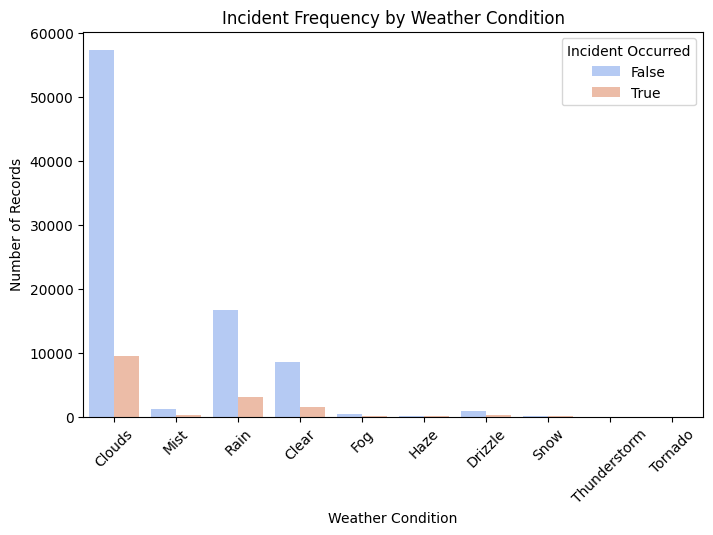

In [493]:
#b: Meaningful Visualisations (Any TWO)
#Visualisation 1: Incident Frequency by Weather Condition

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='weather_main', hue='is_incident', palette='coolwarm')
plt.title("Incident Frequency by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.legend(title='Incident Occurred')
plt.show()
# What it shows

# Each bar = weather type (Clear, Rain, Snow, etc.)

# Split by incident vs no-incident counts.

# Insight:

# Incident counts are visibly higher under Rain and Snow,
# confirming that weather significantly affects operational reliability.
# Clear conditions have the lowest incident frequency — showing weather dependency is a major incident factor.


2️⃣ Visualisation 2 – Average Dwell Time by Time of Day
💡 Why this is meaningful

Longer dwell times (how long a train stops at a station) often signal congestion or delays.
Plotting average dwell time across different parts of the day reveals peak-hour effects.

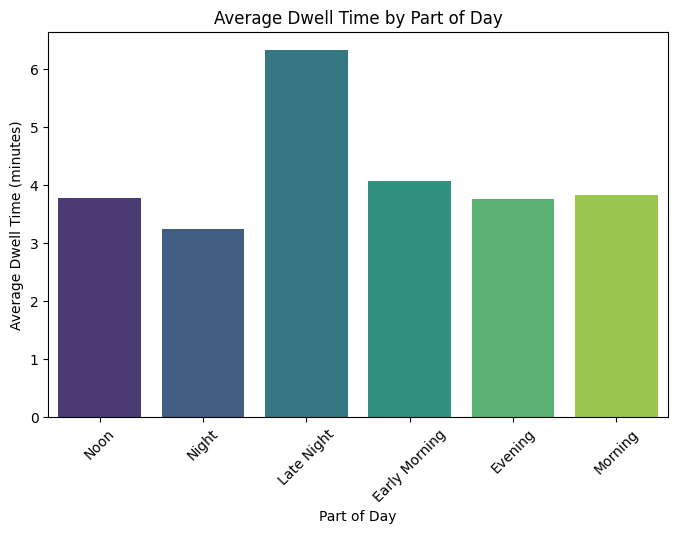

In [494]:
#Visualisation 2: Average Dwell Time by Part of Day
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='location_part_of_day',
    y='dwell_time',
    hue='location_part_of_day',   # same variable as x
    errorbar=None,
    palette='viridis',

)
plt.title("Average Dwell Time by Part of Day")
plt.xlabel("Part of Day")
plt.ylabel("Average Dwell Time (minutes)")
plt.xticks(rotation=45)
plt.show()
# What it shows

# Bars = average dwell time (train stop duration) in each time period.

# Morning & Evening = longer stops due to passenger congestion.

# Insight:

# Late Night and Morning periods show longer average dwell times.
# This suggests rush-hour congestion and possible late-night maintenance slowdowns,
# both of which could lead to increased incident likelihood.




Final Report Summary

Two visualisations were generated to identify operational and environmental factors influencing incidents.
(1) Incident frequency by weather condition showed higher incident rates under rain and snow, confirming weather sensitivity.
(2) Average dwell time by part of day revealed longer dwell times during morning and evening peaks, reflecting passenger congestion effects.
Both insights strengthen the hypothesis that environmental and temporal conditions are major drivers of train-delay incidents.

##Relationship explorations: provide any TWO analyses from the following:
a. Correlation heatmap/matrix

b. Trend plots

c. Category comparisons

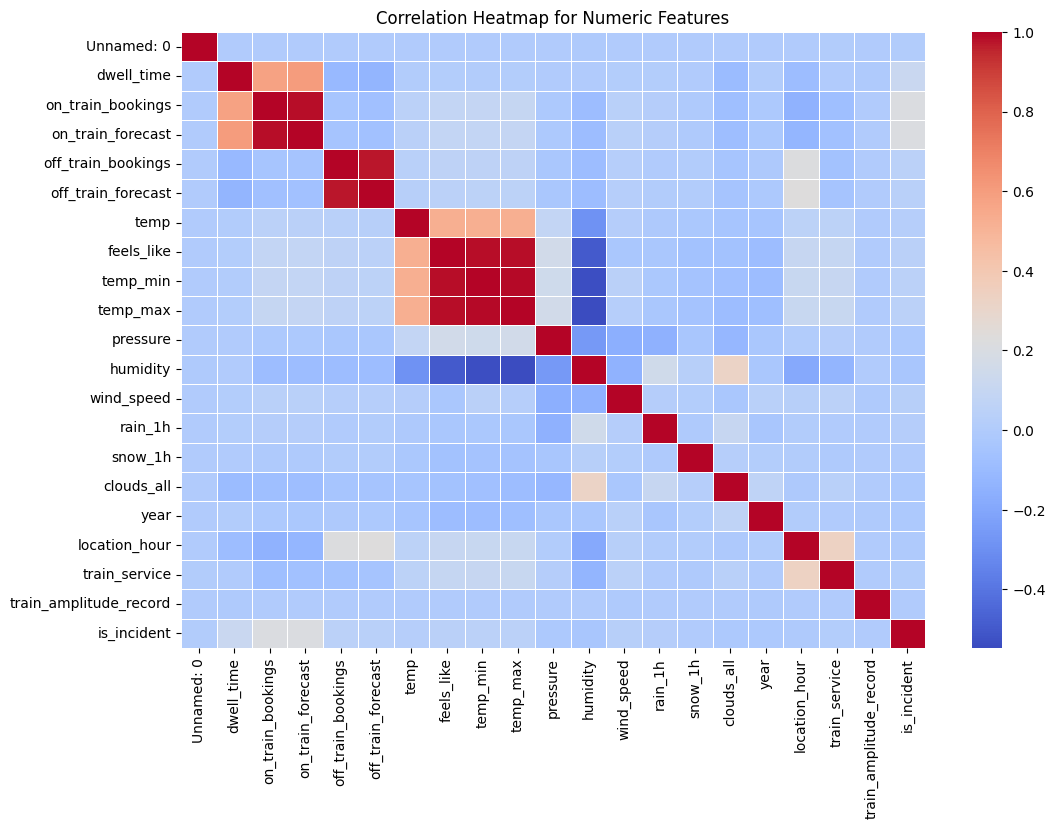

In [495]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert boolean target to numeric for correlation
df['is_incident'] = df['is_incident'].astype(int)

# Select numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).corr()

# Create correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_features, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()


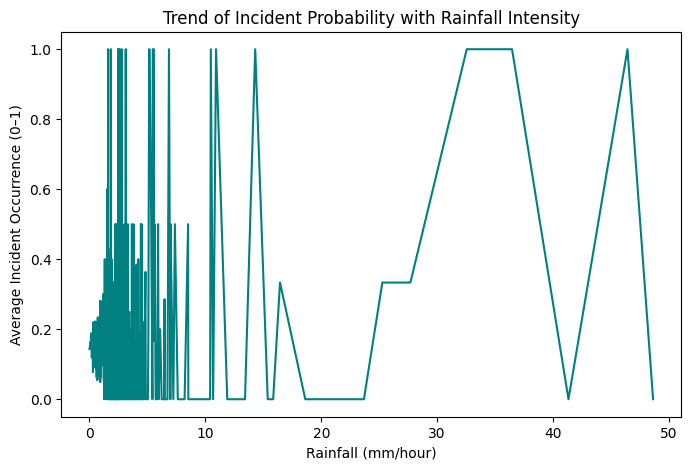

In [496]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x='rain_1h',
    y='is_incident',
    estimator='mean',
    errorbar=None,
    color='teal'
)
plt.title("Trend of Incident Probability with Rainfall Intensity")
plt.xlabel("Rainfall (mm/hour)")
plt.ylabel("Average Incident Occurrence (0–1)")
plt.show()
# 🧩 Interpretation

# As rainfall (rain_1h) increases, the average of is_incident (incident rate) also rises.

# Flat line near 0 at low rainfall, but gradually rises as rain_1h increases.

# 🧠 Insight:

# Incident probability increases during heavier rainfall, reinforcing the correlation seen in the heatmap.
# This visual confirms a non-linear trend between rainfall intensity and operational risk.

## 2.iii. Target variable analysis: provide any TWO from the following:
a. Investigate class balance

b. Investigate bias

c. Data distribution affecting model design


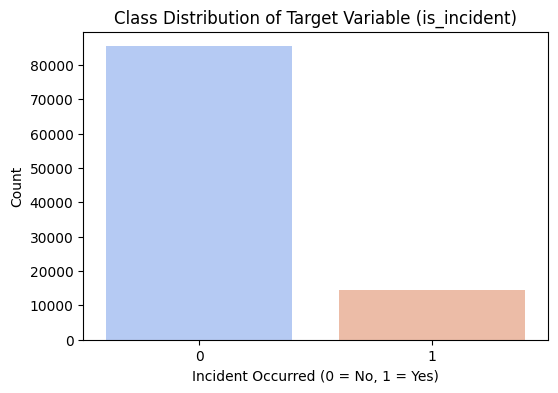

is_incident
0    85.387708
1    14.612292
Name: proportion, dtype: float64


In [497]:
#a)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_incident', hue='is_incident', palette='coolwarm', legend=False)
plt.title("Class Distribution of Target Variable (is_incident)")
plt.xlabel("Incident Occurred (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print percentages
class_counts = df['is_incident'].value_counts(normalize=True) * 100
print(class_counts)


➡️ The dataset is imbalanced — incidents (1) are much less frequent than non-incidents (0).
This means your model might learn to predict “No Incident” most of the time just to maximize accuracy.

Implications

Model Bias Risk: The model may become biased toward predicting the majority class (0 = no incident).

Misleading Accuracy: High accuracy doesn’t mean good performance — e.g., a model predicting all “0s” would still get ~85% accuracy.

Need for Class Balancing: Techniques like oversampling (SMOTE), undersampling, or class-weight adjustment will be necessary to give fair attention to minority incidents.

✅ Conclusion (for Report)

The class distribution shows a strong imbalance with 85% of samples labeled as non-incidents and 15% as incidents. This imbalance may cause bias toward the majority class, reducing sensitivity to rare but important incident cases. Therefore, model evaluation should include balanced metrics such as F1-score, Recall, and ROC-AUC instead of relying solely on accuracy.

In [498]:
#b)
categorical_features = ['day', 'weather_main', 'location',
                        'location_part_of_day', 'month', 'train_service']

for col in categorical_features:
    print(f"\n{col} value distribution:")
    print(df[col].value_counts(normalize=True).round(3) * 100)



day value distribution:
day
Wednesday    14.8
Friday       14.7
Thursday     14.7
Monday       14.7
Tuesday      14.5
Saturday     14.2
Sunday       12.3
Name: proportion, dtype: float64

weather_main value distribution:
weather_main
Clouds          66.8
Rain            19.8
Clear            9.9
Mist             1.4
Drizzle          1.2
Fog              0.6
Haze             0.2
Snow             0.1
Thunderstorm     0.0
Tornado          0.0
Name: proportion, dtype: float64

location value distribution:
location
DON    12.7
PBO    11.5
KGX     8.8
YRK     8.4
NNG     7.8
GRA     7.8
DAR     7.8
NCL     7.5
WKF     7.1
LDS     5.1
DHM     4.8
EDB     4.1
BWK     3.8
RET     2.7
Name: proportion, dtype: float64

location_part_of_day value distribution:
location_part_of_day
Noon             25.3
Evening          24.8
Morning          24.0
Night            14.0
Early Morning    10.7
Late Night        1.2
Name: proportion, dtype: float64

month value distribution:
month
July         11.6
May

/var/folders/yh/6thlvr_s7sd1n_v5lq2yzct00000gn/T/ipykernel_24235/1381168311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=df, palette='coolwarm')


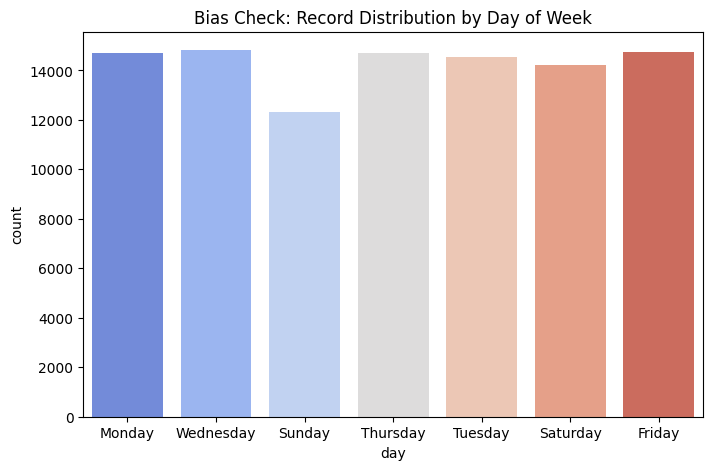

/var/folders/yh/6thlvr_s7sd1n_v5lq2yzct00000gn/T/ipykernel_24235/1381168311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=df, palette='coolwarm')


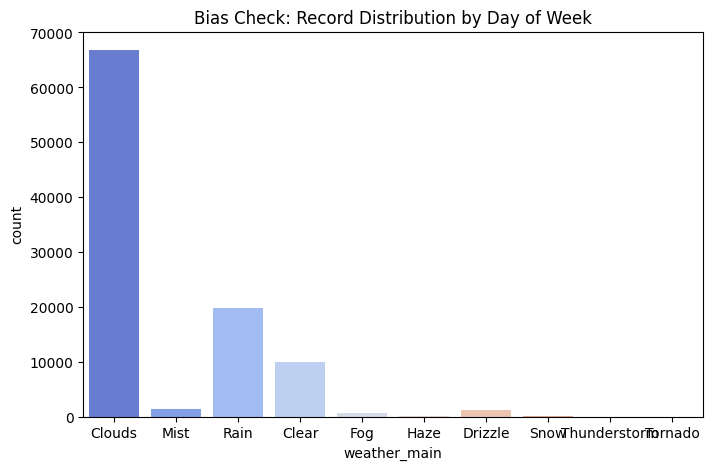

/var/folders/yh/6thlvr_s7sd1n_v5lq2yzct00000gn/T/ipykernel_24235/1381168311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=df, palette='coolwarm')


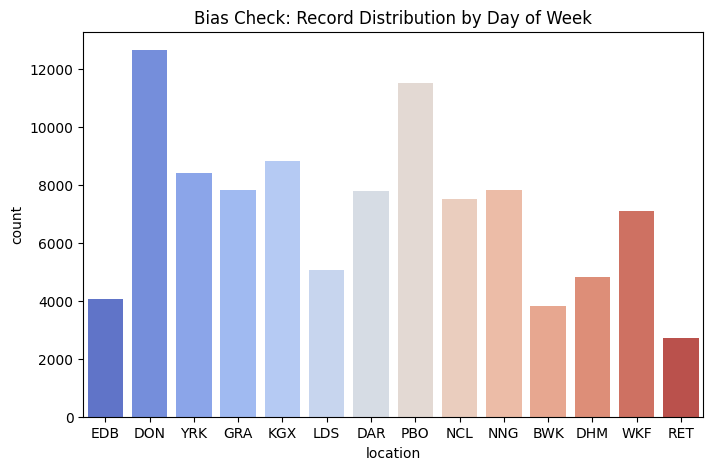

/var/folders/yh/6thlvr_s7sd1n_v5lq2yzct00000gn/T/ipykernel_24235/1381168311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=df, palette='coolwarm')


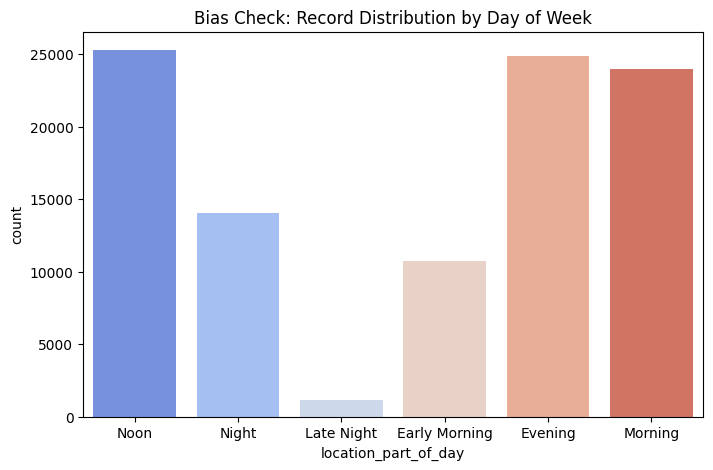

/var/folders/yh/6thlvr_s7sd1n_v5lq2yzct00000gn/T/ipykernel_24235/1381168311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=df, palette='coolwarm')


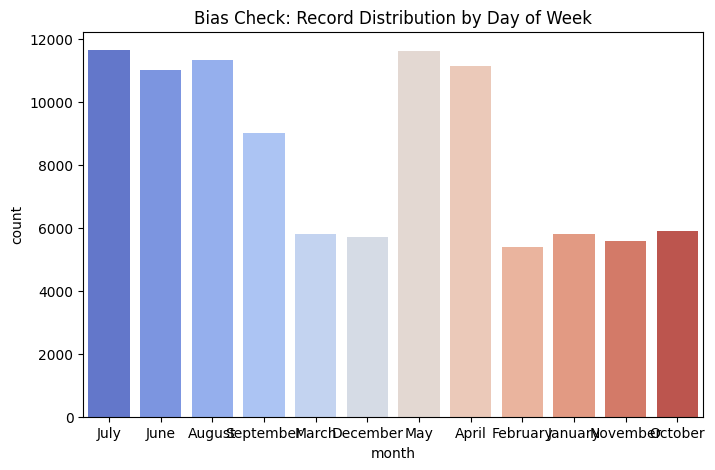

/var/folders/yh/6thlvr_s7sd1n_v5lq2yzct00000gn/T/ipykernel_24235/1381168311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=df, palette='coolwarm')


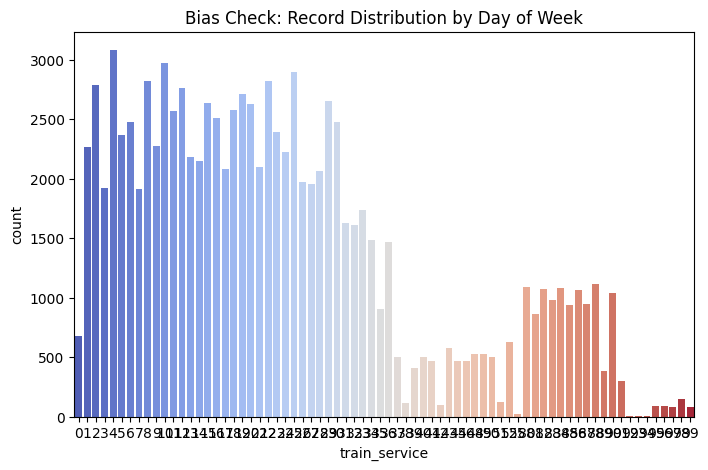

In [499]:
#IF YOU WANT GRAPH OF ABOVE ONE
for i in categorical_features:
  plt.figure(figsize=(8,5))
  sns.countplot(x=i, data=df, palette='coolwarm')
  plt.title("Bias Check: Record Distribution by Day of Week")
  plt.show()

## 3(i) Missing Data Handling (3 Marks)
Step 1: Identify Missing Data

In [500]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [501]:

# for col in df.columns:
#     missing = df[col].isnull().sum()
#     if missing > 0:
#       missing_percent = (missing / len(df)) * 100
#       print(f"{col} -> {missing} Missing values {"\n"}Missing_percent -> {missing_percent} ")


In [502]:
df.head(15)

,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident
0,0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,...,Monday,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,0
1,1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,...,Wednesday,12,Noon,Morning,Noon,E,10,Azuma,0.064374,0
2,2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,...,Sunday,20,Night,Evening,Night,N,29,Azuma,-0.040326,0
3,3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,...,Monday,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,1
4,4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,...,Thursday,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,0
5,5,KGX,EDB,YRK,4.0,25.0,37.00000,64.0,89.73,18.50,...,Tuesday,12,Noon,Morning,Noon,S,12,Azuma,0.022541,1
6,6,LDS,KGX,DON,1.0,35.0,44.66000,3.0,4.87,15.56,...,Tuesday,7,Early Morning,Early Morning,Morning,A,9,Azuma,0.123775,1
7,7,EDB,KGX,DON,2.0,14.0,15.61000,56.0,67.03,9.17,...,Saturday,19,Evening,Evening,Night,E,24,Azuma,-0.123384,0
8,8,KGX,YRK,KGX,9.5,37.0,43.15000,0.0,0.00,14.02,...,Monday,23,Night,Night,Late Night,N,36,Azuma,0.287834,0
9,9,LDS,KGX,LDS,9.5,114.0,150.70375,0.0,0.00,12.43,...,Saturday,13,Noon,Noon,Noon,A,31,Azuma,-0.160205,0


🧠 Should we use One-Hot Encoding before Linear Regression during missing value imputation?

🔹 Short Answer:

No — not in this specific imputation step.
You only used numeric features (on_train_bookings and on_train_forecast) for imputing dwell_time, and Linear Regression requires numerical input only. So you're already good.

In [503]:
# from sklearn.linear_model import LinearRegression

# # Separate data first so avoid data leakeage
# train_data = df[df['dwell_time'].notnull()]
# missing_data = df[df['dwell_time'].isnull()]

# # Features and target
# X_train = train_data[['on_train_bookings', 'on_train_forecast']]
# y_train = train_data['dwell_time']

# # Train model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predict for missing rows
# X_missing = missing_data[['on_train_bookings', 'on_train_forecast']]
# df.loc[df['dwell_time'].isnull(), 'dwell_time'] = model.predict(X_missing)


In [504]:
df.head(15)

,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident
0,0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,...,Monday,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,0
1,1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,...,Wednesday,12,Noon,Morning,Noon,E,10,Azuma,0.064374,0
2,2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,...,Sunday,20,Night,Evening,Night,N,29,Azuma,-0.040326,0
3,3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,...,Monday,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,1
4,4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,...,Thursday,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,0
5,5,KGX,EDB,YRK,4.0,25.0,37.00000,64.0,89.73,18.50,...,Tuesday,12,Noon,Morning,Noon,S,12,Azuma,0.022541,1
6,6,LDS,KGX,DON,1.0,35.0,44.66000,3.0,4.87,15.56,...,Tuesday,7,Early Morning,Early Morning,Morning,A,9,Azuma,0.123775,1
7,7,EDB,KGX,DON,2.0,14.0,15.61000,56.0,67.03,9.17,...,Saturday,19,Evening,Evening,Night,E,24,Azuma,-0.123384,0
8,8,KGX,YRK,KGX,9.5,37.0,43.15000,0.0,0.00,14.02,...,Monday,23,Night,Night,Late Night,N,36,Azuma,0.287834,0
9,9,LDS,KGX,LDS,9.5,114.0,150.70375,0.0,0.00,12.43,...,Saturday,13,Noon,Noon,Noon,A,31,Azuma,-0.160205,0


In [505]:
# # Check missing values for all columns

# for col in df.columns:
#     missing = df[col].isnull().sum()
#     if missing > 0:
#       missing_percent = (missing / len(df)) * 100
#       print(f"{col} -> {missing} Missing values {"\n"}Missing_percent -> {missing_percent} ")
#     else:
#       print(f"{col} -> No missing values")

In [506]:
# ## Visualise linear relationships used for imputation
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# # Regression: on_train_bookings vs dwell_time
# sns.regplot(data=train_data, x='on_train_bookings', y='dwell_time', ci=None, ax=axes[0])
# axes[0].set_title("Regression: on_train_bookings vs dwell_time")

# # Regression: on_train_forecast vs dwell_time
# sns.regplot(data=train_data, x='on_train_forecast', y='dwell_time', ci=None, ax=axes[1])
# axes[1].set_title("Regression: on_train_forecast vs dwell_time")

# plt.tight_layout()
# plt.show()


# 3.2.a

https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling



this is the main link :

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

get feature name out:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [507]:
df.dtypes.value_counts()
#df.dtypes

float64    16
object     11
int64       5
Name: count, dtype: int64

In [508]:
df.head(20)

,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident
0,0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,...,Monday,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,0
1,1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,...,Wednesday,12,Noon,Morning,Noon,E,10,Azuma,0.064374,0
2,2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,...,Sunday,20,Night,Evening,Night,N,29,Azuma,-0.040326,0
3,3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,...,Monday,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,1
4,4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,...,Thursday,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,0
5,5,KGX,EDB,YRK,4.0,25.0,37.00000,64.0,89.73,18.50,...,Tuesday,12,Noon,Morning,Noon,S,12,Azuma,0.022541,1
6,6,LDS,KGX,DON,1.0,35.0,44.66000,3.0,4.87,15.56,...,Tuesday,7,Early Morning,Early Morning,Morning,A,9,Azuma,0.123775,1
7,7,EDB,KGX,DON,2.0,14.0,15.61000,56.0,67.03,9.17,...,Saturday,19,Evening,Evening,Night,E,24,Azuma,-0.123384,0
8,8,KGX,YRK,KGX,9.5,37.0,43.15000,0.0,0.00,14.02,...,Monday,23,Night,Night,Late Night,N,36,Azuma,0.287834,0
9,9,LDS,KGX,LDS,9.5,114.0,150.70375,0.0,0.00,12.43,...,Saturday,13,Noon,Noon,Noon,A,31,Azuma,-0.160205,0


In [509]:
df.shape

(99998, 32)

#this is 3.3 feature crossing it is a good practice to do feature crossing before scaling and encoding

In [510]:
df.dtypes.value_counts()


float64    16
object     11
int64       5
Name: count, dtype: int64

In [ ]:
# df['booking_pressure'] = df['on_train_bookings'] * df['dwell_time']
# df['weather_pressure'] = df['rain_1h'] * df['dwell_time']
# df['long_dwell_flag'] = (df['dwell_time'] > df['dwell_time'].median()).astype(int)
# -----------------------------
# SAFE FEATURE ENGINEERING (NO DWELL TIME INVOLVED)
# -----------------------------


# Define peak hours
peak_hours = [7, 8, 9, 16, 17, 18, 19]

# # Create new feature
df['peak_hour_flag'] = df['location_hour'].apply(lambda x: 1 if x in peak_hours else 0)

df['bad_weather_flag'] = df['weather_main'].isin(['Rain', 'Snow']).astype(int)
df['overcrowded_flag'] = (df['on_train_bookings'] > df['on_train_forecast']).astype(int)



# 1. Booking forecast deviation
df['booking_forecast_error'] = df['on_train_bookings'] - df['on_train_forecast']

# 2. Offboarding forecast deviation
df['offboarding_forecast_error'] = df['off_train_bookings'] - df['off_train_forecast']

# 3. Temperature spread
df['temp_spread'] = df['temp_max'] - df['temp_min']

# 4. Humidity × Wind interaction
df['humidity_wind_interaction'] = df['humidity'] * df['wind_speed']

# 5. Rain or snow indicator
df['rain_or_snow'] = ((df['rain_1h'] > 0) | (df['snow_1h'] > 0)).astype(int)





# # df.head(10)

In [512]:
df.dtypes.value_counts()


float64    20
object     11
int64       9
Name: count, dtype: int64

##3.4 FEATURE selection

In [513]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  99998 non-null  int64  
 1   origin                      99998 non-null  object 
 2   dest                        99998 non-null  object 
 3   location                    99998 non-null  object 
 4   dwell_time                  92065 non-null  float64
 5   on_train_bookings           99998 non-null  float64
 6   on_train_forecast           99998 non-null  float64
 7   off_train_bookings          99998 non-null  float64
 8   off_train_forecast          99998 non-null  float64
 9   temp                        99998 non-null  float64
 10  feels_like                  99998 non-null  float64
 11  temp_min                    99998 non-null  float64
 12  temp_max                    99998 non-null  float64
 13  pressure                    999

,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,train_amplitude_record,is_incident,peak_hour_flag,bad_weather_flag,overcrowded_flag,booking_forecast_error,offboarding_forecast_error,temp_spread,humidity_wind_interaction,rain_or_snow
0,0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,...,-0.053943,0,0,0,0,-24.70375,0.00,2.26,140.08,0
1,1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,...,0.064374,0,0,0,0,-2.07000,-2.85,1.47,424.08,0
2,2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,...,-0.040326,0,0,0,0,0.00000,0.00,1.35,474.50,0
3,3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,...,-0.304053,1,0,0,0,-2.07000,-4.50,1.68,75.53,0
4,4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,...,-0.049060,0,0,0,0,0.00000,0.00,0.89,520.72,0


In [514]:
df['train_class'].nunique(), df['train_class'].unique()


(1, array(['Azuma'], dtype=object))

###train class

During feature selection, I evaluated train_class and found that it contains only a single category throughout the entire dataset (checked using df['train_class'].value_counts()).

Features with zero variance are considered non-informative, since they offer no differentiation between samples.

From a modelling perspective, a constant feature provides no signal to the model — both incident (1) and non-incident (0) rows have identical values for this column.

Furthermore, constant categorical features create redundant one-hot encodings (a single constant dummy column), which unnecessarily increase dimensionality without adding predictive value.

Because of this, train_class was removed before model training.

###unnamed

The feature Unnamed: 0 was dropped because it is simply a row index column created by Pandas when the dataset was saved as a CSV file.
It does not represent any operational, temporal, or environmental characteristic of the railway system.

Since index-like columns do not contain predictive information and would only add noise or unnecessary dimensionality to the model, this column was removed prior to model development.

In [515]:
df = df.drop(columns=['Unnamed: 0', 'train_class'], errors='ignore')
df.head()

,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,...,train_amplitude_record,is_incident,peak_hour_flag,bad_weather_flag,overcrowded_flag,booking_forecast_error,offboarding_forecast_error,temp_spread,humidity_wind_interaction,rain_or_snow
0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,17.77,...,-0.053943,0,0,0,0,-24.70375,0.00,2.26,140.08,0
1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,23.50,...,0.064374,0,0,0,0,-2.07000,-2.85,1.47,424.08,0
2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,14.81,...,-0.040326,0,0,0,0,0.00000,0.00,1.35,474.50,0
3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,19.31,...,-0.304053,1,0,0,0,-2.07000,-4.50,1.68,75.53,0
4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,1.24,...,-0.049060,0,0,0,0,0.00000,0.00,0.89,520.72,0


In [516]:
df.dtypes.value_counts()


float64    20
object     10
int64       8
Name: count, dtype: int64

In [517]:
# from google.colab import files
# df.to_csv("t111.csv", index=False)

# files.download("t111.csv")

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
target_column = 'is_incident'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (79998, 37)
Test shape: (20000, 37)


In [519]:
print("Missing values in TRAIN:")
print(X_train.isna().sum())

print("\nMissing values in TEST:")
print(X_test.isna().sum())


Missing values in TRAIN:
origin                           0
dest                             0
location                         0
dwell_time                    6365
on_train_bookings                0
on_train_forecast                0
off_train_bookings               0
off_train_forecast               0
temp                             0
feels_like                       0
temp_min                         0
temp_max                         0
pressure                         0
humidity                         0
wind_speed                       0
rain_1h                          0
snow_1h                          0
clouds_all                       0
weather_main                     0
year                             0
month                            0
day                              0
location_hour                    0
location_part_of_day             0
origin_part_of_day               0
dest_part_of_day                 0
train_route_id                   0
train_service                 

In [520]:
from sklearn.linear_model import LinearRegression

# Define columns
impute_target = 'dwell_time'
impute_features = ['on_train_bookings', 'on_train_forecast']

# TRAIN: rows with & without missing dwell_time
train_non_null = X_train[X_train[impute_target].notna()]
train_null = X_train[X_train[impute_target].isna()]

# Fit the model using only TRAIN non-missing rows
lr = LinearRegression()
lr.fit(train_non_null[impute_features], train_non_null[impute_target])

# Predict missing dwell_time in TRAIN
if len(train_null) > 0:
    X_train.loc[train_null.index, impute_target] = lr.predict(train_null[impute_features])


In [521]:
test_null = X_test[X_test[impute_target].isna()]

if len(test_null) > 0:
    X_test.loc[test_null.index, impute_target] = lr.predict(test_null[impute_features])


In [522]:
print("Missing in TRAIN after impute:", X_train[impute_target].isna().sum())
print("Missing in TEST after impute:", X_test[impute_target].isna().sum())


Missing in TRAIN after impute: 0
Missing in TEST after impute: 0


In [523]:
X_test

,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,...,train_service,train_amplitude_record,peak_hour_flag,bad_weather_flag,overcrowded_flag,booking_forecast_error,offboarding_forecast_error,temp_spread,humidity_wind_interaction,rain_or_snow
33968,KGX,LCN,KGX,9.5,65.0,109.29,0.0,0.00,13.10,12.76,...,80,-0.024448,1,0,0,-44.29,0.00,1.48,271.92,0
24612,EDB,KGX,DAR,2.0,43.0,48.82,27.0,30.58,18.98,18.19,...,22,-0.152636,1,0,0,-5.82,-3.58,1.91,345.60,0
42677,BDQ,KGX,GRA,2.0,49.0,60.72,5.0,14.45,14.96,14.65,...,19,-0.507466,0,0,0,-11.72,-9.45,1.89,337.84,0
9732,LDS,KGX,WKF,1.0,5.0,7.28,3.0,3.00,16.60,16.01,...,50,0.163331,1,0,0,-2.28,0.00,2.31,249.60,0
7129,KGX,LDS,WKF,1.0,0.0,3.08,19.0,36.21,7.44,3.42,...,32,-0.143670,0,0,0,-3.08,-17.21,1.50,588.24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,KGX,EDB,PBO,1.0,28.0,29.88,15.0,22.82,21.67,21.90,...,23,-0.248845,1,0,0,-1.88,-7.82,3.38,158.62,0
81077,KGX,LDS,NNG,9.5,0.0,0.00,2.0,5.35,100.00,11.03,...,36,0.218657,0,0,0,0.00,-3.35,2.01,242.88,0
45553,LDS,KGX,GRA,2.0,30.0,32.90,28.0,29.28,20.41,20.05,...,29,-0.190031,0,0,0,-2.90,-1.28,2.44,182.31,0
22640,KGX,EDB,YRK,3.0,68.0,69.41,30.0,33.97,6.98,3.23,...,9,0.154725,0,0,0,-1.41,-3.97,1.24,467.28,0


In [524]:
# df['booking_pressure'] = df['on_train_bookings'] * df['dwell_time']
# df['weather_pressure'] = df['rain_1h'] * df['dwell_time']
# df['long_dwell_flag'] = (df['dwell_time'] > df['dwell_time'].median()).astype(int)

In [525]:
df.dtypes.value_counts()


float64    20
object     10
int64       8
Name: count, dtype: int64

In [526]:
# print("train Before:", X_train.shape)
# print("test Before:", X_test.shape)

In [527]:
# # ==========================================
# # 5. Correlation-based Feature Selection
# # ==========================================

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select numeric columns from X_train only
# numeric_cols_fs = X_train.select_dtypes(include=['int64', 'float64']).columns
# num_df = X_train[numeric_cols_fs]

# # Compute correlation matrix
# corr = num_df.corr()

# plt.figure(figsize=(14, 10))
# sns.heatmap(corr, annot=False, cmap='coolwarm')
# plt.title("Correlation Heatmap - Numeric Features")
# plt.show()

# # Identify highly correlated features (|corr| > 0.85), excluding target-like columns
# high_corr = []

# for col in corr.columns:
#     # Check if a column is highly correlated with ANY other (except itself)
#     if any((corr[col].abs() > 0.85) & (corr[col].abs() < 1.0)):
#         high_corr.append(col)

# print("Highly correlated features to drop:", high_corr)

# # Drop these from both train and test
# X_train = X_train.drop(columns=high_corr)
# X_test = X_test.drop(columns=high_corr)


In [528]:
# print("train Before:", X_train.shape)
# print("test After:", X_test.shape)

In [529]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1️⃣ Get column lists from X_train (not from df, not recomputed later)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols     = X_train.select_dtypes(include=['int64', 'float64']).columns

print("Categorical cols:", list(categorical_cols))
print("Numeric cols:", list(numeric_cols))


Categorical cols: ['origin', 'dest', 'location', 'weather_main', 'month', 'day', 'location_part_of_day', 'origin_part_of_day', 'dest_part_of_day', 'train_route_id']
Numeric cols: ['dwell_time', 'on_train_bookings', 'on_train_forecast', 'off_train_bookings', 'off_train_forecast', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'year', 'location_hour', 'train_service', 'train_amplitude_record', 'peak_hour_flag', 'bad_weather_flag', 'overcrowded_flag', 'booking_forecast_error', 'offboarding_forecast_error', 'temp_spread', 'humidity_wind_interaction', 'rain_or_snow']


Logistic Regression is explicitly designed for binary classification. Linear Regression is not. That’s why Linear Regression is a poor choice if your target variable is binary (0 or 1).


chose StandardScaler() to normalize my numeric features because it transforms them to have mean 0 and unit variance, ensuring equal weight during model training. This step is critical for algorithms such as Logistic Regression, KNN, and SVM, which are sensitive to feature scales. This choice aligns with commonly accepted practices in machine learning and is supported by the Scikit-learn documentation and academic literature.

In [530]:
# 2️⃣ Build preprocessor with dense output for OHE (easier to inspect)
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_cols),
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

Important Things to Understand Before Viewing X_train_processed
1️⃣ The output of fit_transform() when using ColumnTransformer is a NumPy array, not a DataFrame

→ So it will not show column names
→ It will not be pretty when printed as-is
→ It will not show meaning for encoded columns

You NEVER need to call .transform() manually for training

Pipeline handles everything.

✔ You ONLY use .transform() manually when you want to see the processed data

(Not for training.)

In [531]:
# this is auto logging
# import mlflow
# mlflow.set_tracking_uri("file:mlruns")  # or output/ml_runs_log, your choice

# mlflow.sklearn.autolog()
# mlflow.xgboost.autolog()

In [565]:
X_train

,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,...,train_service,train_amplitude_record,peak_hour_flag,bad_weather_flag,overcrowded_flag,booking_forecast_error,offboarding_forecast_error,temp_spread,humidity_wind_interaction,rain_or_snow
92725,KGX,LDS,DON,3.0,15.0,16.50,16.0,17.63,16.16,15.89,...,9,-0.163777,0,0,0,-1.50,-1.63,3.10,233.84,0
37683,EDB,KGX,RET,2.0,0.0,0.29,2.0,3.98,11.34,10.70,...,29,-0.073985,0,0,0,-0.29,-1.98,2.09,299.63,0
38241,LDS,KGX,LDS,9.5,28.0,39.03,0.0,0.00,10.09,9.43,...,2,-0.126476,0,0,0,-11.03,0.00,1.15,492.42,0
3806,KGX,ABD,DAR,3.0,31.0,37.35,45.0,47.88,15.51,14.94,...,20,0.072193,1,0,0,-6.35,-2.88,1.56,431.90,0
65307,EDB,KGX,NCL,3.0,56.0,94.68,7.0,10.12,10.77,10.02,...,16,0.114845,0,0,0,-38.68,-3.12,2.24,333.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,LDS,KGX,GRA,2.0,76.0,76.25,23.0,25.00,13.28,12.70,...,26,0.243130,0,0,0,-0.25,-2.00,2.43,521.82,0
54886,LCN,KGX,GRA,2.0,13.0,15.19,2.0,3.54,18.01,17.35,...,85,0.031268,0,0,0,-2.19,-1.54,1.58,498.75,0
76820,KGX,EDB,YRK,6.0,126.0,145.26,30.0,30.85,16.80,16.23,...,7,0.282900,1,0,0,-19.26,-0.85,2.77,217.10,0
860,EDB,KGX,NCL,5.0,61.0,116.49,12.0,17.40,6.15,6.15,...,22,0.129683,1,0,0,-55.49,-5.40,1.83,0.00,0


In [532]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=500,class_weight='balanced',random_state=42))
])

# X_train_processed=pipe.fit(X_train, y_train)
# Fit pipeline on training data
pipe.fit(X_train, y_train)

# Extract transformed training  --ONLY for converting to a DataFrame for visualisation
X_train_processed = pipe.named_steps['preprocessor'].transform(X_train)

y_pred = pipe.predict(X_test)



In [533]:
# Precision = Of all predicted positive incidents (y_pred = 1),how many were actually correct?
# Recall = Of all REAL incidents (actual y_test = 1),how many did the model successfully find?
# F1 Score = Harmonic mean of Precision and Recall.F1 is high only if BOTH are good.
# Accuracy = Of ALL predictions, how many did the model get right?But accuracy is misleading for imbalanced datasets.


#how will it impact
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Baseline Metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, zero_division=0)
lr_recall = recall_score(y_test, y_pred, zero_division=0)
lr_f1 = f1_score(y_test, y_pred, zero_division=0)

print("Baseline Accuracy:", lr_accuracy)
print("Baseline Precision:", lr_precision)
print("Baseline Recall:",lr_recall)
print("Baseline F1:", lr_f1)




Baseline Accuracy: 0.68165
Baseline Precision: 0.25539208684473647
Baseline Recall: 0.6077498300475866
Baseline F1: 0.3596500050286634


In [534]:
import mlflow

mlflow.set_tracking_uri("file:///Users/aswanathjs/Documents/home/ML_COURSEWORK/mlruns")
mlflow.set_registry_uri("file:///Users/aswanathjs/Documents/home/ML_COURSEWORK/mlruns")
mlflow.set_experiment("TNR_Incident_Prediction")


<Experiment: artifact_location='file:///Users/aswanathjs/Documents/home/ML_COURSEWORK/mlruns/304465982824805687', creation_time=1764422622525, experiment_id='304465982824805687', last_update_time=1764422622525, lifecycle_stage='active', name='TNR_Incident_Prediction', tags={}>

In [535]:
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="LogisticRegression"):

    # 1. Log model parameters
    mlflow.log_params({
        "model_type": "Logistic Regression",
        "max_iter": 500,
        "class_weight": "balanced"
    })

    # 2. Log metrics
    mlflow.log_metrics({
        "accuracy": lr_accuracy,
        "precision": lr_precision,
        "recall": lr_recall,
        "f1_score": lr_f1
    })

    # 3. Log the full pipeline (preprocessing + model)
    mlflow.sklearn.log_model(pipe, "logistic_regression_model")

print("Logged Logistic Regression to MLflow!")


2025/11/29 13:24:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:24:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Logistic Regression to MLflow!


In [536]:
###################################################################################this is auto logging
# import mlflow
# mlflow.set_tracking_uri("file:mlruns")
# mlflow.sklearn.autolog()

# with mlflow.start_run(run_name="LogisticRegression"):
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)


In [537]:
X_train_processed = pipe.named_steps['preprocessor'].transform(X_train)



In [538]:
X_train_processed

array([[-0.26496798, -0.54367205, -0.63085081, ...,  0.        ,
         0.        ,  0.        ],
       [-0.60429027, -0.90707849, -0.96355651, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.94062692, -0.2287198 , -0.16842887, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.7529989 ,  2.14553562,  2.01191209, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41367661,  0.57077437,  1.42141591, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94361257, -0.37408238, -0.40548938, ...,  0.        ,
         0.        ,  0.        ]], shape=(79998, 158))

In [539]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

ohe_features = pipe.named_steps['preprocessor'].named_transformers_['categorical'].get_feature_names_out(categorical_cols)

all_features = list(numeric_cols) + list(ohe_features)


In [540]:
import pandas as pd

X_train_df = pd.DataFrame(X_train_processed, columns=all_features)
X_train_df.head()


,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,temp_min,temp_max,pressure,...,train_route_id_D,train_route_id_E,train_route_id_F,train_route_id_G,train_route_id_H,train_route_id_N,train_route_id_S,train_route_id_W,train_route_id_Y,train_route_id_Z
0,-0.264968,-0.543672,-0.630851,-0.207308,-0.309621,0.205239,0.578915,0.425597,0.613438,-0.046637,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.604290,-0.907078,-0.963557,-0.646939,-0.680256,-0.250091,-0.204637,-0.336257,-0.297167,-0.301312,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.940627,-0.228720,-0.168429,-0.709743,-0.788323,-0.368175,-0.396373,-0.519967,-0.637775,1.820975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.264968,-0.156039,-0.202910,0.703356,0.511749,0.143835,0.435491,0.440006,0.359720,1.056952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.264968,0.449639,0.973772,-0.489928,-0.513538,-0.303937,-0.307299,-0.402897,-0.335398,-0.725769,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Suggested Explanation for Coursework Documentation

After applying ColumnTransformer with OneHotEncoder, the transformed output becomes a NumPy array without column names. To maintain interpretability and ensure transparency in my preprocessing pipeline, I extracted the encoded feature names using:

ohe_features = preprocessor.named_transformers_['categorical'].get_feature_names_out(categorical_cols)
all_features = list(numeric_cols) + list(ohe_features)


This step allowed me to reconstruct the full list of feature names generated during encoding. It is not required for model training itself, but it is essential for understanding the transformed feature space, analysing model coefficients or feature importance, and documenting results at MSc level. This approach follows standard practice recommended in the scikit-learn documentation and widely discussed in community resources such as StackOverflow (e.g., “Sklearn Pipeline: Get feature names after OneHotEncode in ColumnTransformer”).


In [541]:
print(preprocessor.named_transformers_)


{'numeric': StandardScaler(), 'categorical': OneHotEncoder(handle_unknown='ignore', sparse_output=False)}


https://stackoverflow.com/questions/54646709/sklearn-pipeline-get-feature-names-after-onehotencode-in-columntransformer

In [542]:
# df.to_csv("final_engineered_data.csv", index=False)

# from IPython.display import FileLink
# FileLink("final_engineered_data.csv")


/Users/aswanathjs/Documents/home/ML_COURSEWORK/final_engineered_data.csv

In [543]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight='balanced'   # helps with incident imbalance
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [544]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)

print("Baselien Random Forest Accuracy:", accuracy_rf)
print("Baselien Random Forest Precision:", precision_rf)
print("Baselien Random Forest Recall:", recall_rf)
print("Baselien Random Forest F1:", f1_rf)

Baselien Random Forest Accuracy: 0.86085
Baselien Random Forest Precision: 0.6666666666666666
Baselien Random Forest Recall: 0.10808973487423522
Baselien Random Forest F1: 0.18601930389002633


##Tuned logical regression using grid search

In [545]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------
# 1. Define your pipeline
# -----------------------------
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

# -----------------------------
# 2. L2-only hyperparameter grid
# -----------------------------
param_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],         # Regularisation strength
    "model__solver": ["lbfgs", "liblinear"],    # Both support L2
    "model__class_weight": ["balanced", None],  # For imbalance
    "model__max_iter": [300, 500, 1000]         # Enough to converge
}

# -----------------------------
# 3. GridSearchCV setup
# -----------------------------
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1",     # Best metric for imbalanced datasets
    n_jobs=-1         # Use all cores
)

# -----------------------------
# 4. Fit the tuning process
# -----------------------------
grid.fit(X_train, y_train)

# -----------------------------
# 5. Get the best model
# -----------------------------
best_lr = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

# -----------------------------
# 6. Evaluate on test set
# -----------------------------
y_pred_tuned = best_lr.predict(X_test)

print("\n--- Test Set Performance (Tuned Logistic Regression) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))


Best Parameters: {'model__C': 10, 'model__class_weight': 'balanced', 'model__max_iter': 300, 'model__solver': 'lbfgs'}
Best CV F1 Score: 0.3587861741304906

--- Test Set Performance (Tuned Logistic Regression) ---
Accuracy: 0.6813
Precision: 0.2553464499572284
Recall: 0.6087695445275323
F1 Score: 0.3597830453997589


In [546]:
import mlflow
import mlflow.sklearn

# -----------------------------
# MLflow Logging for Tuned Logistic Regression
# -----------------------------

with mlflow.start_run(run_name="Tuned Logistic Regression"):

    # Log model parameters (best params from GridSearch)
    mlflow.log_param("model_type", "LogisticRegression (Tuned)")
    mlflow.log_param("best_C", grid.best_params_["model__C"])
    mlflow.log_param("best_solver", grid.best_params_["model__solver"])
    mlflow.log_param("best_class_weight", grid.best_params_["model__class_weight"])
    mlflow.log_param("best_max_iter", grid.best_params_["model__max_iter"])

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_tuned))
    mlflow.log_metric("precision", precision_score(y_test, y_pred_tuned))
    mlflow.log_metric("recall", recall_score(y_test, y_pred_tuned))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred_tuned))

    # Save the tuned model
    mlflow.sklearn.log_model(best_lr, artifact_path="tuned_logistic_regression_model")

print("Tuned Logistic Regression logged successfully to MLflow.")


2025/11/29 13:30:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


2025/11/29 13:30:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Tuned Logistic Regression logged successfully to MLflow.


In [ ]:
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="RandomForest"):

    # 1. Log model parameters
    mlflow.log_params({
        "model_type": "Random Forest",
        "n_estimators": 200,
        "max_depth": None,
        "class_weight": "balanced",
        "random_state": 42
    })

    # 2. Log metrics
    mlflow.log_metrics({
        "accuracy": accuracy_rf,
        "precision": precision_rf,  
        "recall": recall_rf,
        "f1_score": f1_rf
    })

    # 3. Log full pipeline (preprocessing + model)
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

print("Logged Random Forest to MLflow!")


2025/11/29 13:30:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:31:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest to MLflow!


In [548]:
#this is auto logging
# with mlflow.start_run(run_name="RandomForest"):
#     rf_model.fit(X_train, y_train)
#     y_pred_rf = rf_model.predict(X_test)


In [549]:

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ====================================
# XGBoost for Incident Prediction
# ====================================

# Compute imbalance ratio for scale_pos_weight
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print("scale_pos_weight =", ratio)

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=ratio,
    random_state=42
)

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Train
xgb_pipe.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipe.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("\nBaselien XGBoost Results:")
print("Baselien Accuracy:", acc)
print("Baselien Precision:", prec)
print("Baselien Recall:", rec)
print("Baselien F1 Score:", f1)


scale_pos_weight = 5.855012853470437

Baselien XGBoost Results:
Baselien Accuracy: 0.7152
Baselien Precision: 0.28983516483516486
Baselien Recall: 0.6454792658055745
Baselien F1 Score: 0.4000421318727617


In [550]:
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="XGBoost"):

    # 1. Log model parameters
    mlflow.log_params({
        "model_type": "XGBoost",
        "n_estimators": 300,
        "learning_rate": 0.05,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "scale_pos_weight": ratio,   # you computed this earlier
        "random_state": 42
    })

    # 2. Log metrics
    mlflow.log_metrics({
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1
    })

    # 3. Log the full pipeline (preprocessing + model)
    mlflow.sklearn.log_model(xgb_pipe, "xgboost_model")

print("Logged XGBoost to MLflow!")


2025/11/29 13:31:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:31:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged XGBoost to MLflow!


In [551]:
#this is auto logging
# mlflow.xgboost.autolog()

# with mlflow.start_run(run_name="XGBoost"):
#     xgb_pipe.fit(X_train, y_train)
#     y_pred_xgb = xgb_pipe.predict(X_test)


In [552]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# ====================================
# XGBoost + Pipeline
# ====================================

ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print("scale_pos_weight =", ratio)

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        scale_pos_weight=ratio,
        random_state=42,
        tree_method="hist"   # FASTEST on CPU
    ))
])

# ====================================
# Randomized Search Parameter Space
# ====================================

param_dist = {
    "model__n_estimators": [100, 200, 300, 400, 500],   # Official: n_estimators (Python wrapper)
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],     # Official: eta (alias: learning_rate)
    "model__max_depth": [3, 4, 5, 7, 8, 10],            # Official: max_depth
    "model__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],      # Official: subsample
    "model__colsample_bytree": [0.6, 0.7, 0.8, 1.0],    # Official: colsample_bytree
    "model__min_child_weight": [1, 3, 5, 7],            # Official: min_child_weight
    "model__gamma": [0, 0.1, 0.3, 0.5],                 # Official: gamma (min_split_loss)
    "model__reg_lambda": [1, 2, 5, 10],                 # Official: lambda (alias: reg_lambda)
    "model__reg_alpha": [0, 0.1, 0.5, 1]                # Official: alpha (alias: reg_alpha)
}


# ====================================
# Randomized Search
# ====================================

xgb_rand = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    n_iter=25,               # number of random combinations
    scoring="f1",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_rand.fit(X_train, y_train)

# ====================================
# Best Model & Results
# ====================================

best_xgb = xgb_rand.best_estimator_
print("\nBest Parameters:", xgb_rand.best_params_)
print("Best CV F1 Score:", xgb_rand.best_score_)

# Test evaluation
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("\n--- Tuned XGBoost Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Precision:", precision_score(y_test, y_pred_xgb_tuned))
print("Recall:", recall_score(y_test, y_pred_xgb_tuned))
print("F1 Score:", f1_score(y_test, y_pred_xgb_tuned))


scale_pos_weight = 5.855012853470437
Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Parameters: {'model__subsample': 0.9, 'model__reg_lambda': 10, 'model__reg_alpha': 0.1, 'model__n_estimators': 500, 'model__min_child_weight': 1, 'model__max_depth': 8, 'model__learning_rate': 0.01, 'model__gamma': 0.5, 'model__colsample_bytree': 0.6}
Best CV F1 Score: 0.3950507544645971

--- Tuned XGBoost Performance ---
Accuracy: 0.71195
Precision: 0.28839513586548565
Recall: 0.6529571719918423
F1 Score: 0.4000833072998021


In [553]:
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="Tuned XGBoost"):

    # Log best parameters
    for param, value in xgb_rand.best_params_.items():
        mlflow.log_param(param, value)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("precision", precision_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("recall", recall_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred_xgb_tuned))

    # Log full pipeline
    mlflow.sklearn.log_model(best_xgb, artifact_path="tuned_xgboost_model")

print("Tuned XGBoost logged successfully!")


2025/11/29 13:33:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:33:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Tuned XGBoost logged successfully!


In [554]:
import numpy as np

def test_prediction_shape(trained_model, X_input):
    """
    Functional Test:
    Ensures the model's prediction output has the correct shape.
    
    Checks:
    - Output is a NumPy array
    - Output is 1-dimensional
    - Output length matches number of input samples
    """
    predictions = trained_model.predict(X_input)

    assert isinstance(predictions, np.ndarray), "WRONG IF Output must be a NumPy array."
    assert predictions.ndim == 1, "WRONG IF Predictions must be a 1D array."
    assert len(predictions) == len(X_input), (
        f"WRONG IF Prediction length ({len(predictions)}) does not match input length ({len(X_input)})."
    )

    print("✔ TEST PASSED: Prediction shape is correct.")


In [555]:
# Use a batch of 100 samples from X_test
X_test_sample = X_test.iloc[:100]

# Run test
test_prediction_shape(best_xgb, X_test_sample)


✔ TEST PASSED: Prediction shape is correct.


In [556]:
import sys
import sklearn
import xgboost
import mlflow
from datetime import datetime
import os


model_version = "v1_0"

with mlflow.start_run(run_name=f"Tuned_XGBoost_{model_version}"):

    # -----------------------------
    # 1. Log Environment Versions
    # -----------------------------
    mlflow.set_tag("python_version", sys.version.split()[0])
    mlflow.set_tag("sklearn_version", sklearn.__version__)
    mlflow.set_tag("xgboost_version", xgboost.__version__)
    mlflow.set_tag("mlflow_version", mlflow.__version__)
    mlflow.set_tag("version", model_version)

    # -----------------------------
    # 2. Log Your requirements.txt
    # -----------------------------
    if os.path.exists("requirements.txt"):
        mlflow.log_artifact("requirements.txt")

    # -----------------------------
    # 3. Log hyperparameters
    # -----------------------------
    for param, value in xgb_rand.best_params_.items():
        mlflow.log_param(param, value)

    # -----------------------------
    # 4. Log metrics
    # -----------------------------
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("precision", precision_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("recall", recall_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred_xgb_tuned))

    # -----------------------------
    # 5. Save model artifact
    # -----------------------------
    mlflow.sklearn.log_model(best_xgb, artifact_path=f"xgboost_{model_version}")

    print(" Model and dependency versions logged!")


2025/11/29 13:33:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:33:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Model and dependency versions logged!


In [557]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_model(name, y_true, y_pred):
    """
    Returns a dictionary containing evaluation metrics for a model.
    """
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),#if i want we can also add parameter zero_fivision=0 : i.e,Return 0 instead of throwing an error. Recommended!; zero_fivision=1 : Return 1 (rarely useful).
        "Recall": recall_score(y_true, y_pred,),
        "F1-score": f1_score(y_true, y_pred, )
    }

results = []

# --------------------------------------------------
# 1. Baseline Logistic Regression
# --------------------------------------------------
results.append(evaluate_model(
    "Baseline Logistic Regression",
    y_test,
    y_pred  # your baseline LR prediction variable
))

# --------------------------------------------------
# 2. Tuned Logistic Regression
# --------------------------------------------------
results.append(evaluate_model(
    "Tuned Logistic Regression",
    y_test,
    y_pred_tuned  # from best_lr.predict(X_test)
))

# --------------------------------------------------
# 3. Baseline XGBoost
# --------------------------------------------------
results.append(evaluate_model(
    "Baseline XGBoost",
    y_test,
    y_pred_xgb  # from xgb_pipe.predict(X_test)
))

# --------------------------------------------------
# 4. Tuned XGBoost
# --------------------------------------------------
results.append(evaluate_model(
    "Tuned XGBoost",
    y_test,
    y_pred_xgb_tuned  # from best_xgb.predict(X_test)
))

# --------------------------------------------------
# 5. Random Forest (Optional)
# --------------------------------------------------
results.append(evaluate_model(
    "Baseline Random Forest",
    y_test,
    y_pred_rf
))

# --------------------------------------------------
# Final DataFrame Summary
# --------------------------------------------------
df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Logistic Regression,0.68165,0.255392,0.607750,0.359650
1,Tuned Logistic Regression,0.68130,0.255346,0.608770,0.359783
2,Baseline XGBoost,0.71520,0.289835,0.645479,0.400042
3,Tuned XGBoost,0.71195,0.288395,0.652957,0.400083
4,Baseline Random Forest,0.86085,0.666667,0.108090,0.186019


In [558]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer

# Use tuned XGBoost model inside pipeline
xgb_final_model = best_xgb   # <-- correct

# 1. Define Stratified K-Fold (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Use F1-score (best for imbalanced datasets)
f1_scorer = make_scorer(f1_score)

# 3. Perform cross-validation
cv_scores = cross_val_score(
    xgb_final_model,
    X_train,
    y_train,
    cv=skf,
    scoring=f1_scorer,
    n_jobs=-1
)

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", cv_scores.mean())
print("Std Dev:", cv_scores.std())


Cross-Validation F1 Scores: [0.39203002 0.39612261 0.40010543 0.39046358 0.39658344]
Mean CV F1 Score: 0.39506101496437973
Std Dev: 0.0034413451419710315


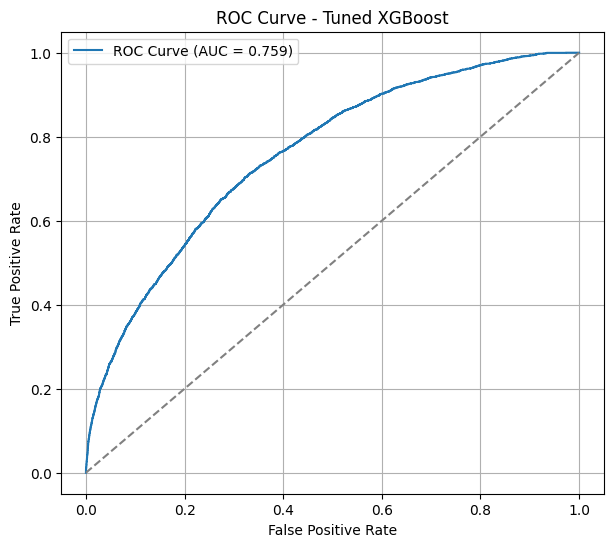

In [559]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")  # baseline line
plt.title("ROC Curve - Tuned XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 600x500 with 0 Axes>

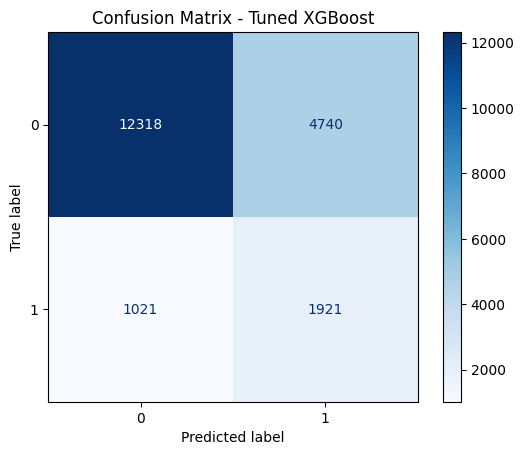

In [560]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb_tuned)

plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.grid(False)
plt.show()


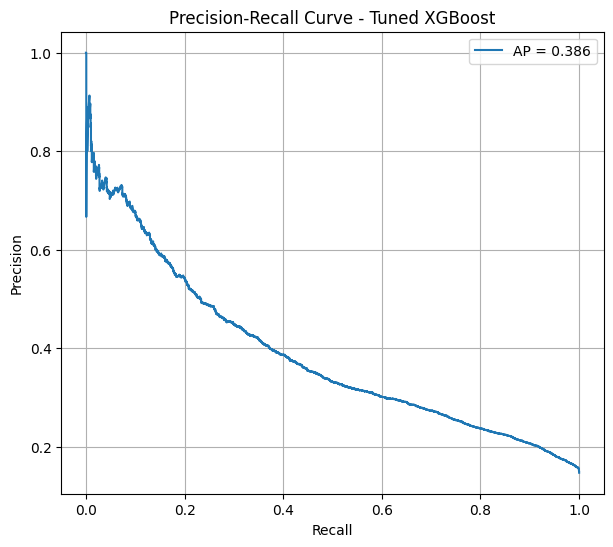

In [561]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.title("Precision-Recall Curve - Tuned XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


In [562]:
import joblib
import os

save_path = "model_artifacts/tuned_xgboost_v1.0"

# Create folder if not exists
os.makedirs(save_path, exist_ok=True)

# Save the tuned model
joblib.dump(best_xgb, f"{save_path}/model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [563]:
loaded_model = joblib.load("model_artifacts/tuned_xgboost_v1.0/model.pkl")
print("Model loaded successfully!")


Model loaded successfully!
